In [1]:
import pandas as pd
import numpy as np

In [2]:
test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
submission=test['PassengerId']

In [3]:
#drop those in cabin number 0 
df.drop(index=df.index[:4], axis=0, inplace=True)
#test.drop(index=df.index[:4], axis=0, inplace=True)

In [4]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
#Where are our null values
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
df = df.fillna(0)
test = test.fillna(0)
train = df
train_RF = df
homeplanet = df['HomePlanet']

In [7]:
#Changing data type to bool for next cell
train['VIP'] = train.VIP.astype('bool')
train['CryoSleep']= train.CryoSleep.astype('bool')

test['VIP'] = test.VIP.astype('bool')
test['CryoSleep']= test.CryoSleep.astype('bool')

In [8]:
#Changing T/F to Binary
train["Transported"] = train["Transported"].astype(int)
train["CryoSleep"]  = train["CryoSleep"].astype(int)
train["VIP"]  = train["VIP"].astype(int)


test["CryoSleep"]  = test["CryoSleep"].astype(int)
test["VIP"]  = test["VIP"].astype(int)

In [9]:
#Turning home planet into dummy variables
planet_dummies = pd.get_dummies(train['HomePlanet'])
planet_dummies.drop([0],axis = 1, inplace = True)
#adding dummy vars back to model
train.drop(['HomePlanet'], axis = 1,inplace = True)
train = train.join(planet_dummies)

planet_dummies2 = pd.get_dummies(test['HomePlanet'])
planet_dummies2.drop([0],axis = 1, inplace = True)
#adding dummy vars back to model
test.drop(['HomePlanet'], axis = 1,inplace = True)
test = test.join(planet_dummies2)

In [10]:
len(test)

4277

In [11]:
planet_dummies

,Earth,Europa,Mars
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
...,...,...,...
8688,0,1,0
8689,1,0,0
8690,1,0,0
8691,0,1,0


In [12]:
df =train

df

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
4,0004_01,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,0,0
5,0005_01,0,F/0/P,PSO J318.5-22,44.0,0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,1,0,0
6,0006_01,0,F/2/S,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1,1,0,0
7,0006_02,1,G/0/S,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,1,1,0,0
8,0007_01,0,F/3/S,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,1,0
8689,9278_01,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,1,0,0
8690,9279_01,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1,0,0
8691,9280_01,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,0,1,0


In [13]:
#Selecting data for first model
#We are going to run a simple logistic regression prediction "Transported" based off HomePlanet, CryoSleep, Age, VIP, RoomService
#FoodCourt, ShoppingMall, Spa, & VRDeck

train = train[['CryoSleep', 'Earth', 'Europa', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' , 'Transported']]

In [14]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    train.drop('Transported',axis=1), 
                                                    train['Transported'], 
                                                    test_size=0.20,
                                                    random_state=10)

In [15]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

#Lets fit the model on training data

logit = LogisticRegression(random_state = 0,solver='liblinear')
logit.fit(X_train,y_train)

#lets make some predictions
y_pred = logit.predict(X_test)

#How accurate are we?

print(f'The logistic regression model correctly predicts whether a passenger will die {100*metrics.accuracy_score(y_test,y_pred):.2f}% of the time')
print(f'The logistic regression model has an R^2 of {r2_score(y_test,y_pred):.2f}%')
print(f'The logistic regression model has a RMSLE of {mean_squared_log_error(y_test,y_pred):.4f}%')


The logistic regression model correctly predicts whether a passenger will die 79.80% of the time
The logistic regression model has an R^2 of 0.19%
The logistic regression model has a RMSLE of 0.0970%


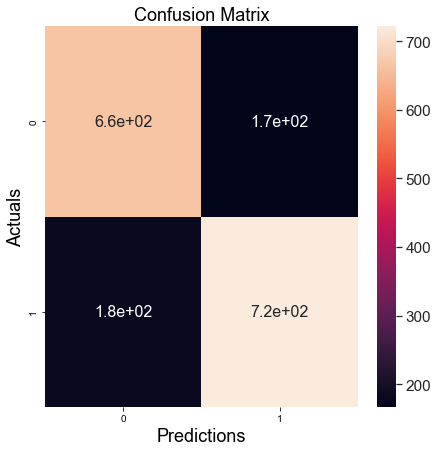

In [16]:
#confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7,7))

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, ax=ax,annot=True, annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [17]:
#Not bad, but lets try to do better, 
#We also get information on the passengers Cabin number, at a glance it is very hard to understand.
#lets explore it
df['Cabin'].fillna('Z/9999/Z', inplace=True)
df.Cabin

test['Cabin'].fillna('Z/9999/Z', inplace=True)


In [18]:
#Lets split the Cabin colummn's (X/XXXX/X) format into seperate categories
df['Cabin_Deck'], df['Cabin_Number'], df['Cabin_Side'] = df['Cabin'].str.split('/', 2).str
df.drop('Cabin', axis =1 , inplace = True)

test['Cabin_Deck'], test['Cabin_Number'], test['Cabin_Side'] = test['Cabin'].str.split('/', 2).str
test.drop('Cabin', axis =1 , inplace = True)

deckSurvival = df[['Transported','Cabin_Deck','Cabin_Number','Cabin_Side']]
deckSurvival

C:\Users\Chris\AppData\Local\Temp/ipykernel_8568/217201646.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Cabin_Deck'], df['Cabin_Number'], df['Cabin_Side'] = df['Cabin'].str.split('/', 2).str
C:\Users\Chris\AppData\Local\Temp/ipykernel_8568/217201646.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  test['Cabin_Deck'], test['Cabin_Number'], test['Cabin_Side'] = test['Cabin'].str.split('/', 2).str


,Transported,Cabin_Deck,Cabin_Number,Cabin_Side
4,1,F,1,S
5,1,F,0,P
6,1,F,2,S
7,1,G,0,S
8,1,F,3,S
...,...,...,...,...
8688,0,A,98,P
8689,0,G,1499,S
8690,1,G,1500,S
8691,0,E,608,S


In [19]:
df

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,Cabin_Deck,Cabin_Number,Cabin_Side
4,0004_01,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,0,0,F,1,S
5,0005_01,0,PSO J318.5-22,44.0,0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,1,0,0,F,0,P
6,0006_01,0,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1,1,0,0,F,2,S
7,0006_02,1,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,1,1,0,0,G,0,S
8,0007_01,0,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,216.0,0.0,Andona Beston,1,1,0,0,F,3,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,1,0,A,98,P
8689,9278_01,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,1,0,0,G,1499,S
8690,9279_01,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1,0,0,G,1500,S
8691,9280_01,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,0,1,0,E,608,S


c:\users\chris\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


[Text(0.5, 0, 'Cabin Deck'), Text(0, 0.5, 'Deaths')]

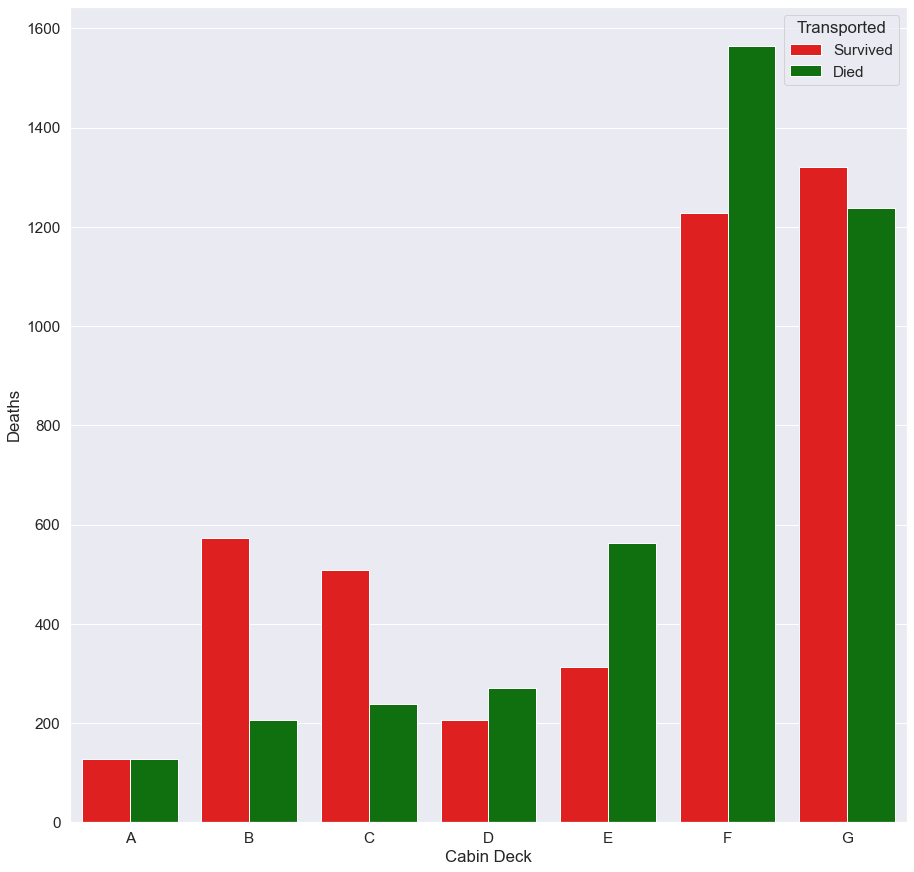

In [20]:
#How does survival rate look per deck?
deckSurvival.loc[deckSurvival['Transported'] == 0, 'Transported'] = 'Died'
deckSurvival.loc[deckSurvival['Transported'] == 1, 'Transported'] = 'Survived'
fig=plt.figure(figsize=(15,15))

sns.countplot(data=deckSurvival, x='Cabin_Deck', hue='Transported',order=['A','B','C','D','E','F','G'],
              palette = ['red', 'green']).set(xlabel ='Cabin Deck', ylabel = 'Deaths')


In [21]:
#How does the survival rate look per Cabin Number?
#lets split by every 200 
cabin_df = df[['Transported','Cabin_Deck','Cabin_Number','Cabin_Side']]


cabin_df['Cabin_Number'] = cabin_df['Cabin_Number'].dropna()
cabin_df['Cabin_Number'] = cabin_df['Cabin_Number'].astype(np.float).astype("Int32")



cabin_df2 = test[['Cabin_Deck','Cabin_Number','Cabin_Side']]


cabin_df2['Cabin_Number'] = cabin_df2['Cabin_Number'].dropna()
cabin_df2['Cabin_Number'] = cabin_df2['Cabin_Number'].astype(np.float).astype("Int32")


C:\Users\Chris\AppData\Local\Temp/ipykernel_8568/1295081055.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabin_df['Cabin_Number'] = cabin_df['Cabin_Number'].dropna()
C:\Users\Chris\AppData\Local\Temp/ipykernel_8568/1295081055.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cabin_df['Cabin_Number'] = cabin_df['Cabin_Number'].astype(np.float).astype("Int32")
C:\Users\Chris\AppData\Local\Temp/ipykernel_8568/1295081

In [23]:
test['Cabin_Number'] =test['Cabin_Number'].fillna(0)

test['Cabin_Number'] = test['Cabin_Number'].astype(int)

In [25]:
def room_convert(x):
    if(0 < int(x) <= 200):
        return 1
    elif(201 < x <= 400):
        return 2
    elif(401 < x <= 600):
        return 3
    elif(601 < x <= 800):
        return 4
    elif(801 < x <= 1000):
        return 5
    elif(1001 < x <= 1200):
        return 6
    elif(1201 < x <= 1400):
        return 7
    elif(1401 < x <= 1600):
        return 8
    elif(1601 < x <= 1800):
        return 9
    elif(1801 < x <= 2000):
        return 10
    
def room_convert_sub(x):
    if( x <= 200):
        return '0-200'
    elif(201 < x <= 400):
        return '201-400'
    elif(401 < x <= 600):
        return '401-600'
    elif(601 < x <= 800):
        return '601-800'
    elif(801 < x <= 1000):
        return '801-1000'
    elif(1001 < x <= 1200):
        return '1001-1200'
    elif(1201 < x <= 1400):
        return '1201-1400'
    elif(1401 < x <= 1600):
        return '1401-1600'
    elif(1601 < x <= 1800):
        return '1601-1800'
    elif(1801 < x):
        return '1801-2000'

In [26]:
test['Cabin_Number'] = test['Cabin_Number'].apply(room_convert_sub)

In [27]:
test.head()

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Earth,Europa,Mars,Cabin_Deck,Cabin_Number,Cabin_Side
0,0013_01,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,0,0,G,0-200,S
1,0018_01,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,0,0,F,0-200,S
2,0019_01,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,1,0,C,0-200,S
3,0021_01,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,1,0,C,0-200,S
4,0023_01,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,0,0,F,0-200,S


In [29]:
#split into 200 length segments
df_bins = df
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600,1800,2000]
names =['1-201','201-400', '401-600', '601-800', '801-1000','1001-1200','1201-1400','1401-1600', '1601-1800','1801-2000']
df_bins['roomRange'] = pd.cut(cabin_df['Cabin_Number'], bins, labels = names)
df_bins = df.dropna()
roomSurvival = df_bins[['roomRange', 'Transported']]

# roomSurvival['Cabin_Number'] = roomSurvival['Cabin_Number'].astype(np.float).astype('int')
roomSurvival['Transported'] = roomSurvival['Transported'].astype(int)



# bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600,1800]
# names =['1-201','201-400', '401-600', '601-800', '801-1000','1001-1200','1201-1400','1401-1600', '1601-1800']
# test['roomRange'] = pd.cut(cabin_df2['Cabin_Number'], bins, labels = names)
# test= test.dropna()



C:\Users\Chris\AppData\Local\Temp/ipykernel_8568/1058905990.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roomSurvival['Transported'] = roomSurvival['Transported'].astype(int)


In [31]:
roomSurvival.head()

,roomRange,Transported
4,1-201,1
6,1-201,1
8,1-201,1
9,1-201,1
10,1-201,1


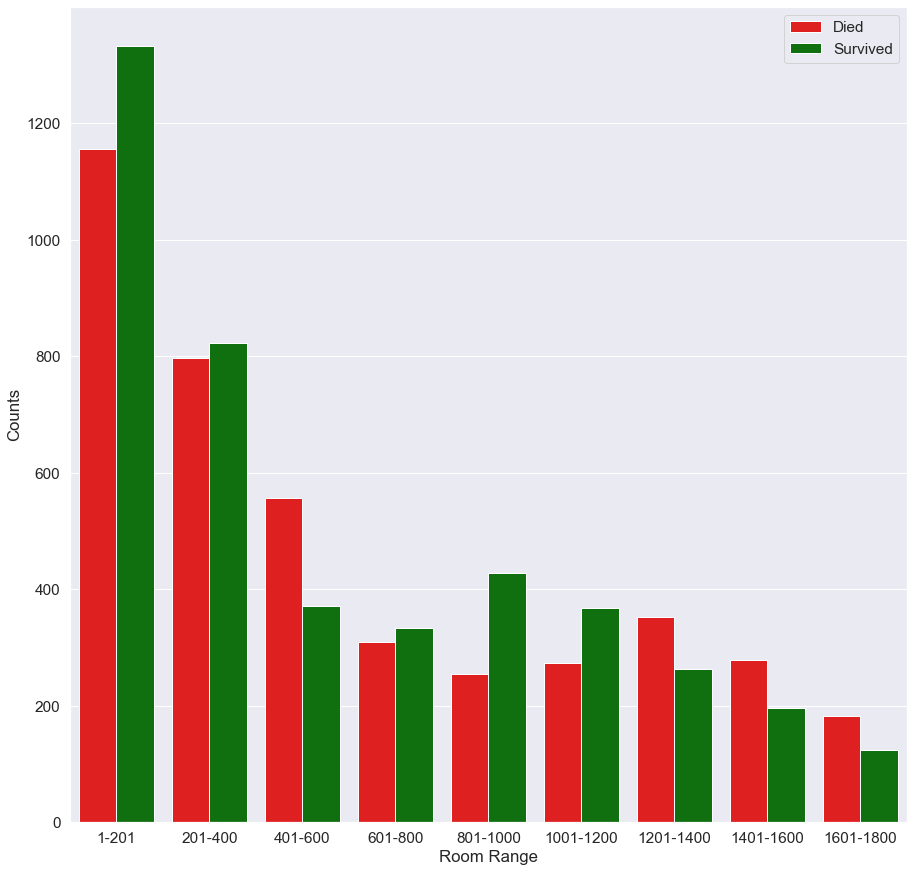

In [32]:
fig=plt.figure(figsize=(15,15))
sns.countplot(data=roomSurvival, x='roomRange', hue='Transported',order=['1-201','201-400','401-600','601-800','801-1000','1001-1200','1201-1400', '1401-1600','1601-1800'],
              palette = ['red', 'green']).set(xlabel ='Room Range', ylabel = 'Counts')
plt.legend(labels = ['Died', 'Survived'])

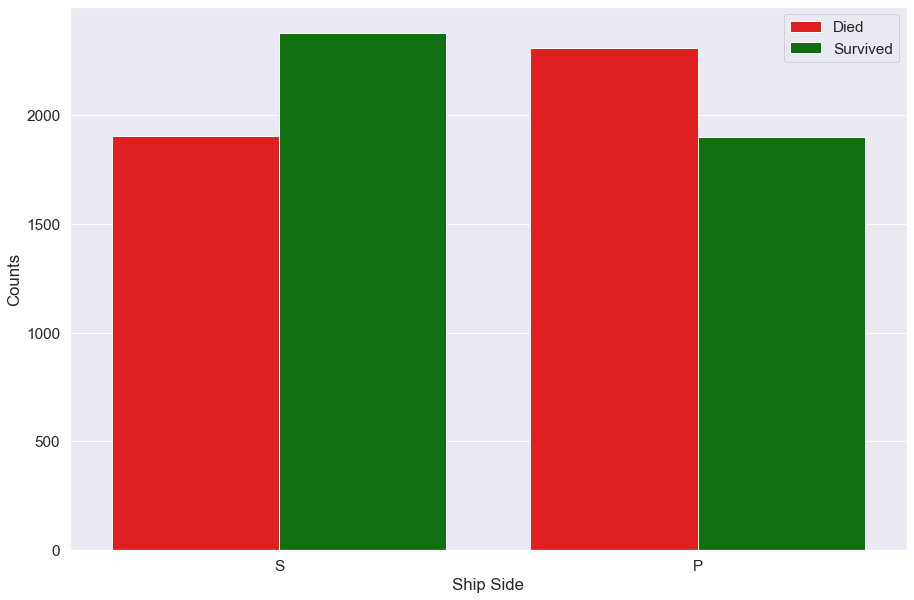

In [33]:
#What about Cabin Side?
fig=plt.figure(figsize=(15,10))

sns.countplot(data=df, x='Cabin_Side', hue='Transported', palette = ['red', 'green']).set(xlabel ='Ship Side', ylabel = 'Counts')
plt.legend(labels = ['Died', 'Survived'])


In [34]:
#creating dummies to use in model later
deck_dummies = pd.get_dummies(df['Cabin_Deck'])
room_dummies = pd.get_dummies(df['roomRange'])
side_dummies = pd.get_dummies(df['Cabin_Side'])

#adding dummy vars back to model
df.drop(['Cabin_Deck'], axis = 1,inplace = True)
df = df.join(deck_dummies)

df.drop(['roomRange'], axis = 1,inplace = True)
df = df.join(room_dummies)

df.drop(['Cabin_Side'], axis = 1,inplace = True)
df = df.join(side_dummies)


deck_dummies2 = pd.get_dummies(test['Cabin_Deck'])
room_dummies2 = pd.get_dummies(test['Cabin_Number'])
side_dummies2 = pd.get_dummies(test['Cabin_Side'])

#adding dummy vars back to model
test.drop(['Cabin_Deck'], axis = 1,inplace = True)
test = test.join(deck_dummies2)

test.drop(['Cabin_Number'], axis = 1,inplace = True)
test = test.join(room_dummies2)

test.drop(['Cabin_Side'], axis = 1,inplace = True)
test = test.join(side_dummies2)





#Final pre-processing for model
#including dropping one of the dummy variables
submission = df['PassengerId']
submission_RF = df['PassengerId'].to_frame()
df.drop(['PassengerId','Destination','Name','T','P','Earth','1-201','Cabin_Number'], axis =1, inplace = True)
df.columns
submission = test['PassengerId'].to_frame()
test.drop(['PassengerId','Destination','Name','T','P','Earth','0-200',], axis =1, inplace = True)




In [35]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    df.drop('Transported',axis=1), 
                                                    df['Transported'], 
                                                    test_size=0.20,
                                                    random_state=4)

In [36]:
logit = LogisticRegression(random_state=0,solver='liblinear')
logit = logit.fit(X_train, y_train)

# making predictions on the testing set
y_pred = logit.predict(X_test)
 
    
#How accurate are we?

print(f'The logistic regression model correctly predicts whether a passenger will die {100*metrics.accuracy_score(y_test,y_pred):.2f}% of the time')
print(f'The logistic regression model has an R^2 of {r2_score(y_test,y_pred):.2f}%')
print(f'The logistic regression model has a RMSLE of {mean_squared_log_error(y_test,y_pred):.4f}%')

The logistic regression model correctly predicts whether a passenger will die 78.60% of the time
The logistic regression model has an R^2 of 0.14%
The logistic regression model has a RMSLE of 0.1028%


In [37]:

submission['Transported'] = logit.predict(test).astype(bool)
submission.to_csv('submission.csv', index=False)
submission.head()


c:\users\chris\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [39]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print('The accuracy of the Random Forest is {0:4.4f}'.format(metrics.accuracy_score(y_test, y_pred)))

The accuracy of the Random Forest is 0.7929
